#### Muhammad Kevin Alrahmanto (19/445592/PA/19416) ft. $Openai.com$

# 1. Linear Discriminant Analysis

**Linear Discriminant Analysis (LDA)** is a dimensionality reduction technique commonly used in the field of machine learning and statistical modeling. The main objective of LDA is to project a high-dimensional dataset into a lower-dimensional subspace while retaining as much class separability as possible.

In LDA, the aim is to find the linear combination of features that provides the best separation between different classes. This is achieved by maximizing the ratio of between-class variance to within-class variance, known as the Fisher's criterion. The resulting linear combinations are called "discriminant functions" or "discriminants", and they are used to project the original data points into a new subspace, where the classes are well separated.

LDA is widely used for applications such as pattern recognition, image processing, and text classification, among others. It is particularly useful when the number of features is large compared to the number of samples, and when the classes are well separated in the feature space.

**Linear Discriminant Analysis (LDA) is a statistical technique used to separate and classify different groups or classes based on their characteristics. Imagine you have a basket of apples and oranges, and you want to separate the apples from the oranges based on their size and color.**

LDA is like a machine that helps you in this task by analyzing the size and color of each fruit and then creating a boundary or line that separates the apples from the oranges. The machine does this by finding the combination of size and color that best separates the two types of fruit.

In a more technical sense, LDA works by projecting the data into a lower-dimensional space, where the classes are separated as much as possible. This new space is called a "discriminant space", and the values of the data in this space are used to make predictions about which class a new data point belongs to.

So, in simple terms, LDA is a tool that helps you separate different classes of objects based on their characteristics, and it does this by finding the combination of characteristics that best separates them.






## 1. SImulated Data

## Part 1

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

np.random.seed(0)

mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
class1 = np.random.multivariate_normal(mean1, cov1, 100)
mean2 = [2, 5]
cov2 = [[1, 0], [0, 1]]
class2 = np.random.multivariate_normal(mean2, cov2, 100)

X = np.concatenate((class1, class2))
y = np.concatenate((np.zeros(100), np.ones(100)))

clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

X_transformed = clf.transform(X)

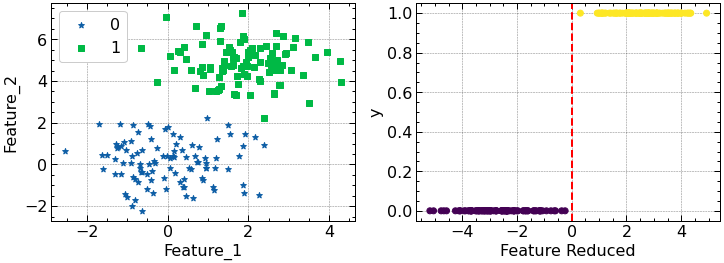

In [50]:
figure, ax=plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(np.transpose(X[np.where(y==0)])[0], np.transpose(X[np.where(y==0)])[1],marker='*', label='0')
ax[0].scatter(np.transpose(X[np.where(y==1)])[0], np.transpose(X[np.where(y==1)])[1],marker='s', label= '1')
ax[0].set_xlabel('Feature_1')
ax[0].set_ylabel('Feature_2')
ax[0].legend()

ax[1].scatter(np.transpose(X_transformed)[0], y, c=y)
ax[1].set_xlabel('Feature Reduced')
ax[1].axvline(0, ls='--', color='red')
ax[1].set_ylabel('y');

Check Also: https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot


## Part 2

In [170]:
np.random.seed(13)

# Generate 3 linearly separable dataset of 2 features
X = [[0,0]]*25+[[0,10]]*25+[[10,10]]*25
X = np.array(list(map(lambda x: list(map(lambda y: np.random.randn()+y, x)), X)))
y = np.array([0]*25+[1]*25+[2]*25)
pd.DataFrame(X).tail()

,0,1
70,10.501168,10.919985
71,9.155524,9.483557
72,7.793133,9.596871
73,10.713325,9.053364
74,10.351362,10.788570


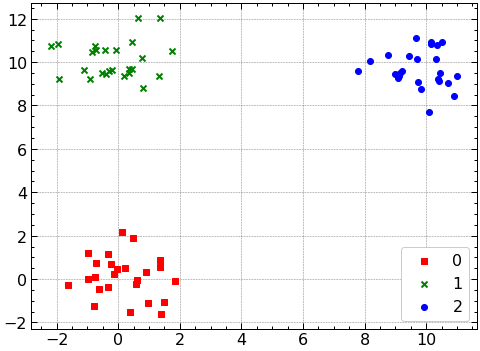

In [171]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_object = lda.fit(X, y)

# Plot the hyperplanes
for l,c,m in zip(np.unique(y),['r','g','b'],['s','x','o']):
    plt.scatter(X[y==l,0],
                X[y==l,1],
                c=c, marker=m, label=l)
plt.legend();

1. coef_ : shape of (n_classes, n_features)
2. intercept_ :  shape of (n_classes,)

If you have 3 classes you will get 3 hyperplanes (decision boundaries) for each class. If there are n features then each hyperplane is represented using n weights (coefficients) and 1 intersect. In general

In [172]:
lda.coef_

array([[-4.00776517, -8.53635375],
       [-3.75812744,  4.22160742],
       [ 7.76589261,  4.31474633]])

In [173]:
lda.intercept_

array([ 34.59616142, -30.62975475, -86.91000608])

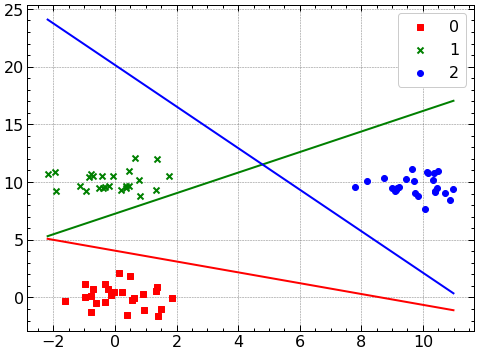

In [158]:
# Plot the hyperplanes
for l,c,m in zip(np.unique(y),['r','g','b'],['s','x','o']):
    plt.scatter(X[y==l,0],
                X[y==l,1],
                c=c, marker=m, label=l)
plt.legend()
x1 = np.array([np.min(X[:,0], axis=0), np.max(X[:,0], axis=0)])
for i, c in enumerate(['r','g','b']):
    b, w1, w2 = lda.intercept_[i], lda.coef_[i][0], lda.coef_[i][1]
    y1 = -(b+x1*w1)/w2    
    plt.plot(x1,y1,c=c)

In [186]:
y_pred = lda.predict([[10,15]])
y_pred

array([2])

## 1.2 Iris DataSet

### LDA Visualization

In [121]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Convert the data into a pandas dataframe
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Separate the feature data from the target data
X = data.drop('target', axis=1)
y = data['target']

# Initialize the LDA model
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit the LDA model to the data
X_lda = lda.fit_transform(X, y)

# Print the explained variance ratio of the LDA model
print("Explained Variance Ratio:", lda.explained_variance_ratio_)

Explained Variance Ratio: [0.9912126 0.0087874]


This code will train an LDA model on the Iris dataset, reduce the feature space from 4 dimensions to 2 dimensions, and print the explained variance ratio of the LDA model. **The explained variance ratio tells us the percentage of the total variance in the data that is explained by each dimension of the reduced feature space.**

In [122]:
X.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [123]:
pd.DataFrame(X_lda, columns=['LDA_1', 'LDA_2']).tail()

,LDA_1,LDA_2
145,-5.645003,1.677717
146,-5.179565,-0.363475
147,-4.967741,0.821141
148,-5.886145,2.345091
149,-4.683154,0.332034


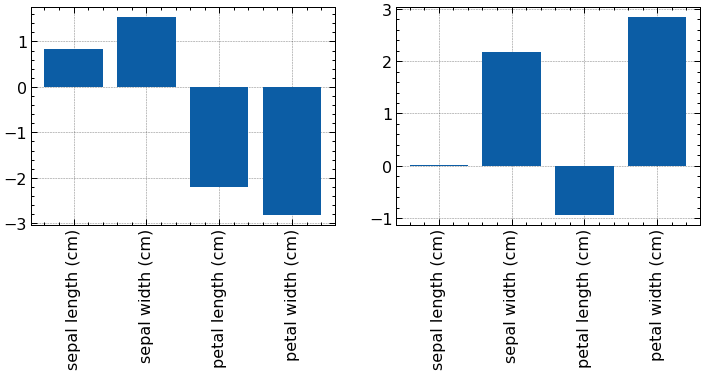

In [124]:
fig, ax=plt.subplots(1, 2, figsize=(12, 4))
ax[0].bar(range(4),np.transpose(lda.scalings_)[0])
ax[0].set_xticks(range(4),X.columns, rotation=90)

ax[1].bar(range(4),np.transpose(lda.scalings_)[1])
ax[1].set_xticks(range(4),X.columns,  rotation=90);

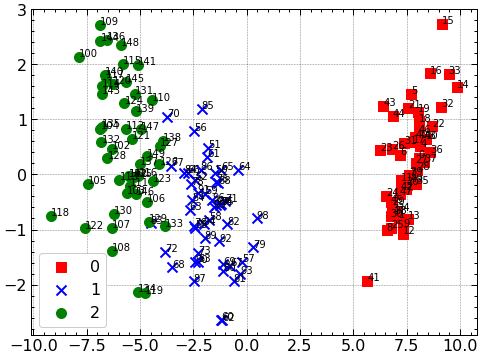

In [126]:
#https://stackoverflow.com/a/47006391

scatter_x = np.transpose(X_lda)[0]
scatter_y = np.transpose(X_lda)[1]

group = y
cdict = {0: 'red', 1: 'blue', 2: 'green'}
markers = ['s', 'x', 'o']

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], marker=markers[int(g)], label = int(g), s = 100)
ax.legend()

for i, txt in enumerate(y):
    plt.annotate(i, (X_lda[i,0], X_lda[i,1]));

https://stats.stackexchange.com/a/136611

**PCs in PCA are linear combinations of original variables that sequentially maximally explain total variance in the multidimensional dataset** You will have as many PCs as you do original variables. The percent of the variance the PCs explain is given by the eigenvalues of the similarity matrix used, and the coefficient for each original variable on each new PC is given by the eigenvectors. PCA has no assumptions about groups. PCA is very good for seeing how multiple variables change in value across your data (in a biplot, for example). Interpreting a PCA relies heavily on the biplot.

**LDA is different for a very important reason - it creates new variables (LDs) by maximizing variance between groups. These are still linear combinations of original variables, but rather than explain as much variance as possible with each sequential LD, instead they are drawn to maximize the DIFFERENCE between groups along that new variable.** Rather than a similarity matrix, LDA (and MANOVA) use a comparison matrix of between and within groups sum of squares and cross-products. The eigenvectors of this matrix - the coefficients that the OP was originally concerned with - describe how much the original variables contribute to the formation of the new LDs.

**For these reasons, the eigenvectors from the PCA will give you a better idea how a variable changes in value across your data cloud, and how important it is to total variance in your dataset, than the LDA.** However, the LDA, particularly in combination with a MANOVA, will give you a statistical test of difference in multivariate centroids of your groups, and an estimate of error in allocation of points to their respective groups (in a sense, multivariate effect size). In an LDA, even if a variable changes linearly (and significantly) across groups, its coefficient on an LD may not indicate the "scale" of that effect, and depends entirely on the other variables included in the analysis.

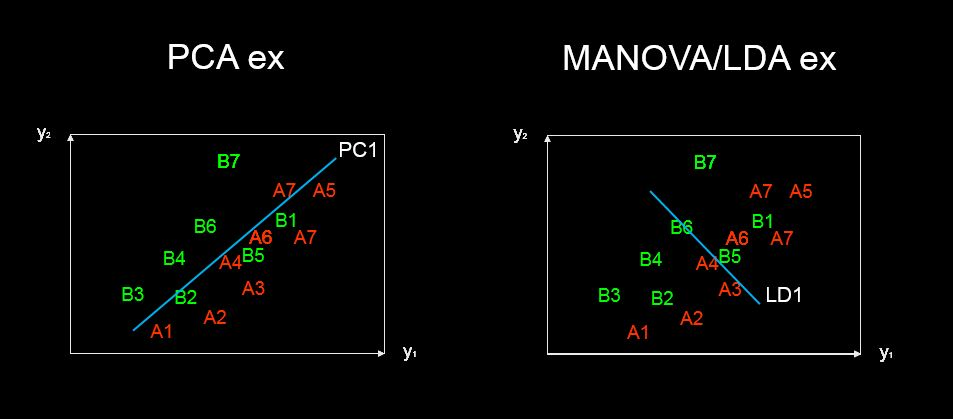

**The classifier is being trained on data in the space defined by the principle components of the training data. It doesn't make sense to evaluate it in a different space - therefore, you should apply the same transformation to testing data as you did to training data, so don't compute a different pca_coef.**

Incidently, if your testing data is drawn independently from the same distribution as the training data, then for large enough training and test sets, the principle components should be approximately the same.

One method for choosing how many principle components to use involves examining the eigenvalues from the PCA decomposition. You can get these from the princomp function like this:

[pca_coeff score eigenvalues] = princomp(data);
The eigenvalues variable will then be an array where each element describes the amount of variance accounted for by the corresponding principle component. If you do:

plot(eigenvalues);
you should see that the first eigenvalue will be the largest, and they will rapidly decrease (this is called a "Scree Plot", and should look like this: http://www.ats.ucla.edu/stat/SPSS/output/spss_output_pca_5.gif, though your one may have up to 800 points instead of 12).

Principle components with small corresponding eigenvalues are unlikely to be useful, since the variance of the data in those dimensions is so small. Many people choose a threshold value, and then select all principle components where the eigenvalue is above that threshold. An informal way of picking the threshold is to look at the Scree plot and choose the threshold to be just after the line 'levels out' - in the image I linked earlier, a good value might be ~0.8, selecting 3 or 4 principle components.

IIRC, you could do something like:

proportion_of_variance = sum(eigenvalues(1:k)) ./ sum(eigenvalues);
to calculate "the proportion of variance described by the low dimensional data".

However, since you are using the principle components for a classification task, you can't really be sure that any particular number of PCs is optimal; the variance of a feature doesn't necessarily tell you anything about how useful it will be for classification. An alternative to choosing PCs with the Scree plot is just to try classification with various numbers of principle components and see what the best number is empirically.
https://stackoverflow.com/a/10819792

### LDA Predict

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Convert the data into a pandas dataframe
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Separate the feature data from the target data
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the LDA model
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit the LDA model to the training data
lda.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred = lda.predict(X_test)

# Print the accuracy of the model
accuracy = lda.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [137]:
lda.coef_

array([[  8.1275542 ,  10.4403064 , -18.09572929, -20.26509894],
       [ -2.02274275,  -3.47918377,   4.57342306,   1.89260222],
       [ -5.50302573,  -6.32823069,  12.19356339,  16.37074038]])

In [139]:
lda.intercept_

array([-16.45427126,   0.05542795, -31.34959824])

Linear Discriminant Analysis (LDA) is a dimension reduction technique that is commonly used for classification problems. It can also be used as a feature selection technique.

The basic idea behind LDA is to project the feature space into a lower-dimensional space while maintaining the class separability of the data. The new lower-dimensional space is defined by a set of linear discriminants, which are the directions in which the class means are most separated.

**Here are the steps to perform LDA:**

1. Compute the d-dimensional mean vectors for each class, where d is the number of features.

2. Compute the within-class scatter matrix (SW), which is the sum of class covariance matrices.

3. Compute the between-class scatter matrix (SB), which is the sum of the covariance matrices between the mean vectors and the overall mean.

4. Compute the eigenvectors and eigenvalues of the matrix SW^(-1) SB.

5. Select the k eigenvectors that correspond to the k largest eigenvalues, where k is the desired number of dimensions for the new feature space.

6. Project the data into the new k-dimensional space using the eigenvectors as the new axes.

In summary, LDA seeks to maximize the ratio of the between-class scatter and the within-class scatter, which results in a new feature space that best separates the classes. The data can then be projected into this new feature space and then be used with a classifier, such as logistic regression or k-nearest neighbors, to perform classification.

1. solver: The solver to be used for the computation of the LDA transform. There are two options available: "svd" (Singular Value Decomposition) and "lsqr" (Least Squares). The default is "svd".

2. shrinkage: A scalar between 0 and 1 that specifies the amount of shrinkage to be applied to the covariance matrix during estimation. A value of 0 corresponds to no shrinkage, and a value of 1 corresponds to complete shrinkage. The default is None, which corresponds to no shrinkage.

3. priors: An array of prior probabilities for each class. The default value is None, which assumes equal prior probabilities for each class.

4. n_components: The number of linear discriminants to be used in the projection. If None, all discriminants are used. The default is None.

5. store_covariance: A Boolean value that determines whether the covariance matrix should be stored. The default value is False.

6. tol: The tolerance for termination of the optimization process. The default value is 0.0001.

7. store_means: A Boolean value that determines whether the mean vectors for each class should be stored. The default value is False.

# 2. Quadratic Discriminant Analysis

**Quadratic Discriminant Analysis (QDA) is a classification technique used in machine learning and statistical analysis. It is a type of discriminant analysis, which is a method for classifying a set of observations into two or more classes based on their characteristics or features.**

QDA is similar to Linear Discriminant Analysis (LDA) in that both methods attempt to find a linear combination of features that can best discriminate between the different classes. The difference between the two methods is that QDA models the covariance between the features differently for each class. In QDA, the covariance matrix is estimated for each class and used to calculate the probabilities of an observation belonging to each class.

In contrast, LDA assumes that the covariance matrices for each class are equal and calculates a common covariance matrix for all classes. This assumption makes LDA computationally simpler and faster, but also limits its ability to model complex relationships between the features.

QDA is more flexible than LDA, as it allows for different covariance structures between classes, but it is also more computationally complex and requires a larger sample size to produce accurate results. QDA is particularly useful when the classes are well separated and the covariance matrices between classes are significantly different.

## 2.1 Iris Dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

# Split the data into features and target variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Fit the QDA model to the training data
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = qda.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

Accuracy:  0.9333333333333333
Confusion Matrix: 
 [[12  0  0]
 [ 0  6  2]
 [ 0  0 10]]


**The QuadraticDiscriminantAnalysis class in the scikit-learn library has several parameters that can be used to control its behavior and performance. Here are some of the most commonly used parameters:**

1. store_covariance: A Boolean value that determines whether the covariance matrices for each class should be stored. The default value is False.

2. tol: The tolerance for termination of the optimization process. The default value is 0.0001.

3. reg_param: A regularization parameter that controls the amount of regularization applied to the covariance estimates. The default value is 0.0.

4. priors: An array of prior probabilities for each class. The default value is None, which assumes equal prior probabilities for each class.

5. store_covariances: A Boolean value that determines whether the covariance matrices should be stored. The default value is False.

6. store_means: A Boolean value that determines whether the mean vectors for each class should be stored. The default value is False.

7. store_inv_covariances: A Boolean value that determines whether the inverse covariance matrices for each class should be stored. The default value is False.

## 2.2 LDA vs QDA

Quadratic Discriminant Analysis (QDA) and Linear Discriminant Analysis (LDA) are two popular dimensionality reduction and classification techniques used in the field of machine learning.

Here are some differences between QDA and LDA:

1. Model Complexity: QDA is a more complex model than LDA because it models the class covariance matrix as full covariance matrices, whereas LDA assumes that all classes have the same covariance matrix.

2. Assumptions: LDA assumes that the classes have equal covariance matrices and that the predictors are normally distributed. QDA does not make these assumptions, but it requires more data to accurately estimate the covariance matrices for each class.

3. Class separability: LDA is a linear method that works well when the classes are linearly separable. QDA can handle non-linearly separable classes because it models the covariance matrices as quadratic forms.

4. Speed: LDA is faster to train and predict than QDA because it has a simpler structure. QDA is more computationally intensive because it has to estimate the covariance matrices for each class.

5. Overfitting: LDA is less likely to overfit the data compared to QDA, as it makes fewer assumptions about the data. On the other hand, QDA can overfit the data if there are too few samples for each class.

### 3 Classes (.predict)

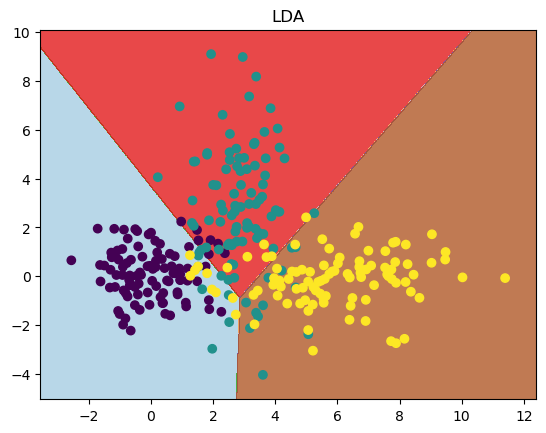

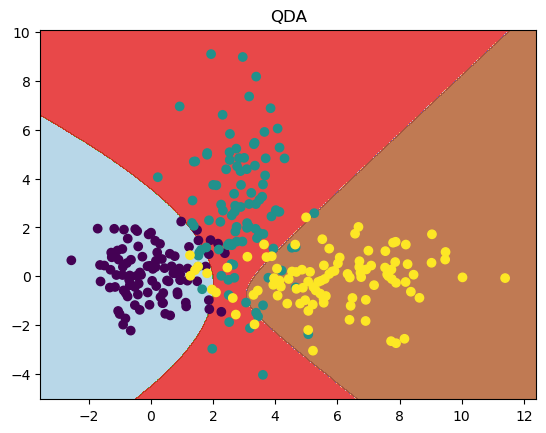

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Generate random data for 3 classes in 2 dimensions
np.random.seed(0)
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
class1 = np.random.multivariate_normal(mean1, cov1, 100)
mean2 = [3, 3]
cov2 = [[1, 0], [0, 7]]
class2 = np.random.multivariate_normal(mean2, cov2, 100)
mean3 = [6, 0]
cov3 = [[4, 0], [0, 1]]
class3 = np.random.multivariate_normal(mean3, cov3, 100)
X = np.concatenate((class1, class2, class3), axis=0)
y = np.concatenate((np.zeros(100), np.ones(100), 2 * np.ones(100)))

# Fit LDA and QDA models
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
lda.fit(X, y)
qda.fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z_lda = lda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_qda = qda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot the data and decision boundary
plt.figure()
plt.title('LDA')
plt.contourf(xx, yy, Z_lda, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

plt.figure()
plt.title('QDA')
plt.contourf(xx, yy, Z_qda, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

### 2 Classes (.predict_proba)

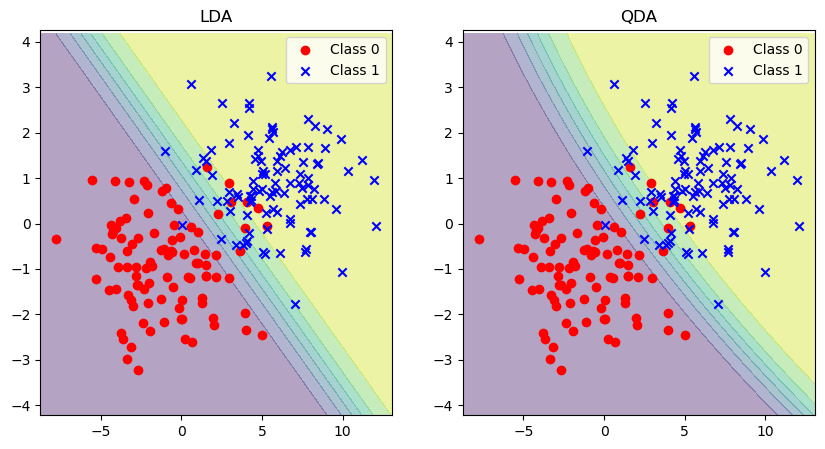

In [69]:
# Generate data for 2 classes
np.random.seed(0)
means = [[-1, -1], [6, 1]]
cov = [[7, 0], [0, 1]]
X0 = np.random.multivariate_normal(means[0], cov, 100)
X1 = np.random.multivariate_normal(means[1], cov, 100)
X = np.concatenate((X0, X1), axis=0)
y = np.concatenate((np.zeros(100), np.ones(100)))

# Fit LDA and QDA models
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
lda.fit(X, y)
qda.fit(X, y)

# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
z_lda = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
z_qda = qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
z_lda = z_lda.reshape(xx.shape)
z_qda = z_qda.reshape(xx.shape)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.contourf(xx, yy, z_lda, alpha=0.4)
plt.scatter(X0[:, 0], X0[:, 1], color='red', marker='o', label='Class 0')
plt.scatter(X1[:, 0], X1[:, 1], color='blue', marker='x', label='Class 1')
plt.title("LDA")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()

plt.subplot(122)
plt.contourf(xx, yy, z_qda, alpha=0.4)
plt.scatter(X0[:, 0], X0[:, 1], color='red', marker='o', label='Class 0')
plt.scatter(X1[:, 0], X1[:, 1], color='blue', marker='x', label='Class 1')
plt.title("QDA")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend();

In the context of a Linear Discriminant Analysis (LDA) model, **predict_proba** is a method that outputs the predicted class probabilities for each sample in a given dataset.

The class probabilities represent the likelihood that each sample belongs to a specific class. These probabilities can be interpreted as the confidence or certainty of the model's prediction for each sample. In LDA, the predicted class probabilities are **computed based on Bayes' theorem, assuming a Gaussian distribution for each class.**

The predict_proba method in LDA outputs a matrix with one row for each sample in the input dataset, and one column for each class. Each entry in the matrix represents the predicted probability that the sample belongs to the corresponding class. The predicted class with the highest probability is the one that the model assigns as the predicted label for that sample.

In general, when using the predict_proba method for any machine learning model, it is important to consider the threshold for classifying a sample into a specific class. By default, the class with the highest predicted probability is used as the predicted class, but in some cases, you may want to adjust the threshold to balance the trade-off between false positive and false negative predictions.

# 3. Logistic Regression (Continued)

**Generalized linear models (GLMs) is a type of statistical model that allows for the response variable to have a non-normal distribution. It is a flexible and widely used framework for modeling a range of different types of relationships between the predictor variables and the response variable.**

To put it simply, a generalized linear model is a way of analyzing and understanding the relationship between variables, where the response variable (the outcome you're interested in) may not follow a normal distribution. For example, if you're interested in the relationship between a person's height and weight, a traditional linear model may not be appropriate because weight is not normally distributed. Instead, you can use a generalized linear model to model the relationship between height and weight.

In essence, GLMs provide a framework for modeling relationships between variables that might not fit neatly into a traditional linear model. They allow us to analyze a wide variety of data and make predictions or understand relationships in a more robust and accurate way.

**GLMs provide a unified framework for modeling the relationship between a set of predictor variables and a response variable that can have a non-normal distribution.** This is achieved by using a **link function** to transform the response variable into a form that is suitable for modeling with a linear regression. The link function maps the expected value of the response variable to a linear combination of the predictor variables.

In GLMs, the error structure of the model is described by a probability distribution from the exponential family, such as normal, Poisson, or binomial distributions. This allows GLMs to model a wide range of response types, including continuous, binary, and count data.

GLMs also provide a way to handle overdispersion, or the presence of extra variation in the response variable compared to what is expected under the assumed distribution. This is achieved by incorporating a dispersion parameter into the model, which allows for modeling of the error structure that better fits the data.

Overall, GLMs provide a flexible and powerful framework for statistical modeling, allowing statisticians to analyze complex relationships between variables, make predictions, and test hypotheses.

**logistic regression is a type of generalized linear model that is used for binary classification problems.** It is a statistical method that models the relationship between the response variable (which is binary) and one or more predictor variables. The relationship between the response variable and the predictors is modeled using a logistic function, which transforms the linear combination of the predictors into a probability.

Mathematically, logistic regression can be represented as follows:

Let Y be the response variable, which takes on the values 0 or 1, and X be the predictor matrix (with each column representing a predictor variable and each row representing a data point). The logistic regression model estimates the probability that Y = 1 as a function of the predictors, given by:

$$P(Y = 1 | X) = \frac{1}{1 + e^{-X^\intercal \beta}}$$

where $\beta$ is a vector of coefficients that are estimated from the data, and $X^\intercal$ is the transpose of X.

In essence, logistic regression is a method for modeling the relationship between the predictors and the response variable in a way that is appropriate for binary classification problems, where the response variable can only take on two possible values. The logistic function ensures that the predicted probabilities are always between 0 and 1, which is necessary for binary classification.

**The z-statistic is used in logistic regression to determine the significance of each predictor variable in the model.** It measures the number of standard deviations that the estimated coefficient for a predictor is away from zero. A larger z-statistic indicates that the predictor is more likely to be significant. Here's how you can calculate the z-statistic for a logistic regression model from scratch:

1. Estimate the coefficients for the predictor variables in the logistic regression model using maximum likelihood estimation.

2. Calculate the standard error for each coefficient by taking the square root of the corresponding variance in the covariance matrix.

3. Divide each coefficient by its standard error to get the z-statistic:

4. Compare the z-statistic to a standard normal distribution (mean of 0 and standard deviation of 1) to determine the p-value. A p-value less than 0.05 is often considered to be statistically significant.

5. Repeat the steps above for each predictor variable in the model to determine the significance of each one.

**Regularized logistic regression is a type of logistic regression that incorporates a penalty term in the cost function to discourage overly complex models and reduce overfitting.** Overfitting occurs when a model is too complex and fits the training data too well, capturing even the noise and random fluctuations in the data. As a result, such a model may not generalize well to new, unseen data.

In regularized logistic regression, the penalty term is added to the standard logistic regression cost function, which measures the difference between the predicted probabilities and the actual labels. The most commonly used penalties in regularized logistic regression are the L1 (Lasso) and L2 (Ridge) penalties.

L1 regularization adds a penalty term proportional to the absolute value of the coefficients, which encourages the coefficients to be sparse (i.e., many coefficients are close to zero). This makes L1 regularization useful for feature selection, as the zero coefficients effectively remove the corresponding predictors from the model.

L2 regularization adds a penalty term proportional to the square of the coefficients, which encourages the coefficients to be small. This makes L2 regularization useful for avoiding overfitting by shrinking the coefficients towards zero.

In general, regularized logistic regression can lead to improved model performance by reducing overfitting and improving the interpretability of the model. The degree of regularization is controlled by a hyperparameter, which can be tuned using cross-validation.

## 3.1 Lasso Logistic Regression

**Using Iris dataset, and let's pretend that there are 2 classes**

In [55]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris["data"]
y = (iris["target"] == 2).astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [56]:
# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Train a Lasso logistic regression model
logreg = LogisticRegression(penalty="l1", C=0.1, solver='saga' )
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 1.0


The above code loads the Iris dataset, standardizes the features, splits the data into training and test sets, and trains a Lasso logistic regression model with a regularization strength of 0.1 (C=0.1). The model is then used to make predictions on the test set, and the accuracy score is calculated and printed.

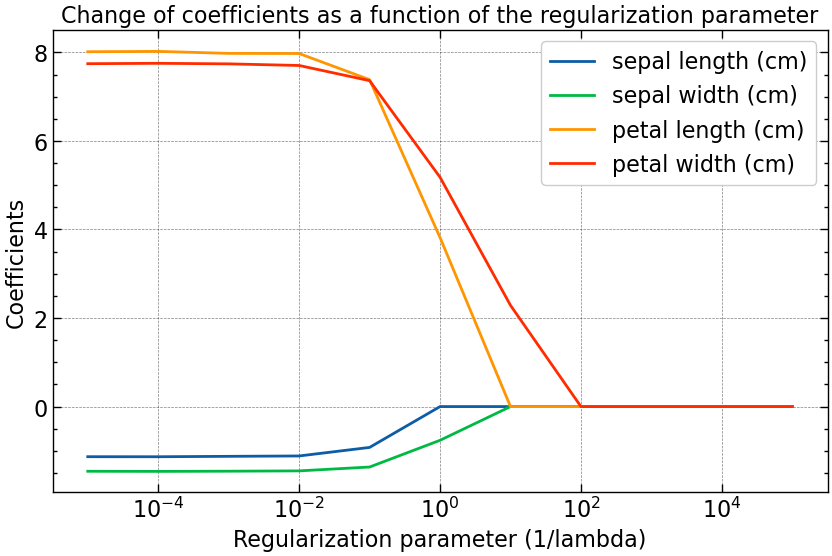

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris["data"]
y = (iris["target"] == 2).astype(int)

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Define a range of regularization parameters
alphas = np.logspace(-5, 5, 11)

# Store the coefficients at each iteration
coefs = []
for alpha in alphas:
    logreg = LogisticRegression(penalty="l1", C=1/alpha, solver='saga')
    logreg.fit(X_std, y)
    coefs.append(logreg.coef_[0])

# Plot the coefficients as a function of the regularization parameter
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(alphas, [coef[i] for coef in coefs], label=iris.feature_names[i])
plt.xscale("log")
plt.xlabel("Regularization parameter (1/lambda)")
plt.ylabel("Coefficients")
plt.title("Change of coefficients as a function of the regularization parameter")
plt.legend()
plt.show()

In Lasso logistic regression, **the regularization parameter C is the inverse of the strength of the regularization term in the loss function.** A smaller value of C means a stronger regularization and vice versa. The exact form of the loss function for Lasso logistic regression depends on the specific implementation, but it typically includes a term that penalizes large values of the coefficients, and C determines the magnitude of this penalty.

In practice, C is used to control the trade-off between model fit and model complexity. A smaller value of C leads to a more parsimonious model with fewer non-zero coefficients, while a larger value of C allows the model to fit the data more closely by giving the coefficients more freedom to take on larger values. By selecting an appropriate value of C, it is possible to balance the trade-off between model fit and interpretability, and prevent overfitting or underfitting.

In scikit-learn, the default value of C for Lasso logistic regression is 1.0, but this value can be changed as needed to achieve the desired balance between fit and complexity.

## Adding interaction terms

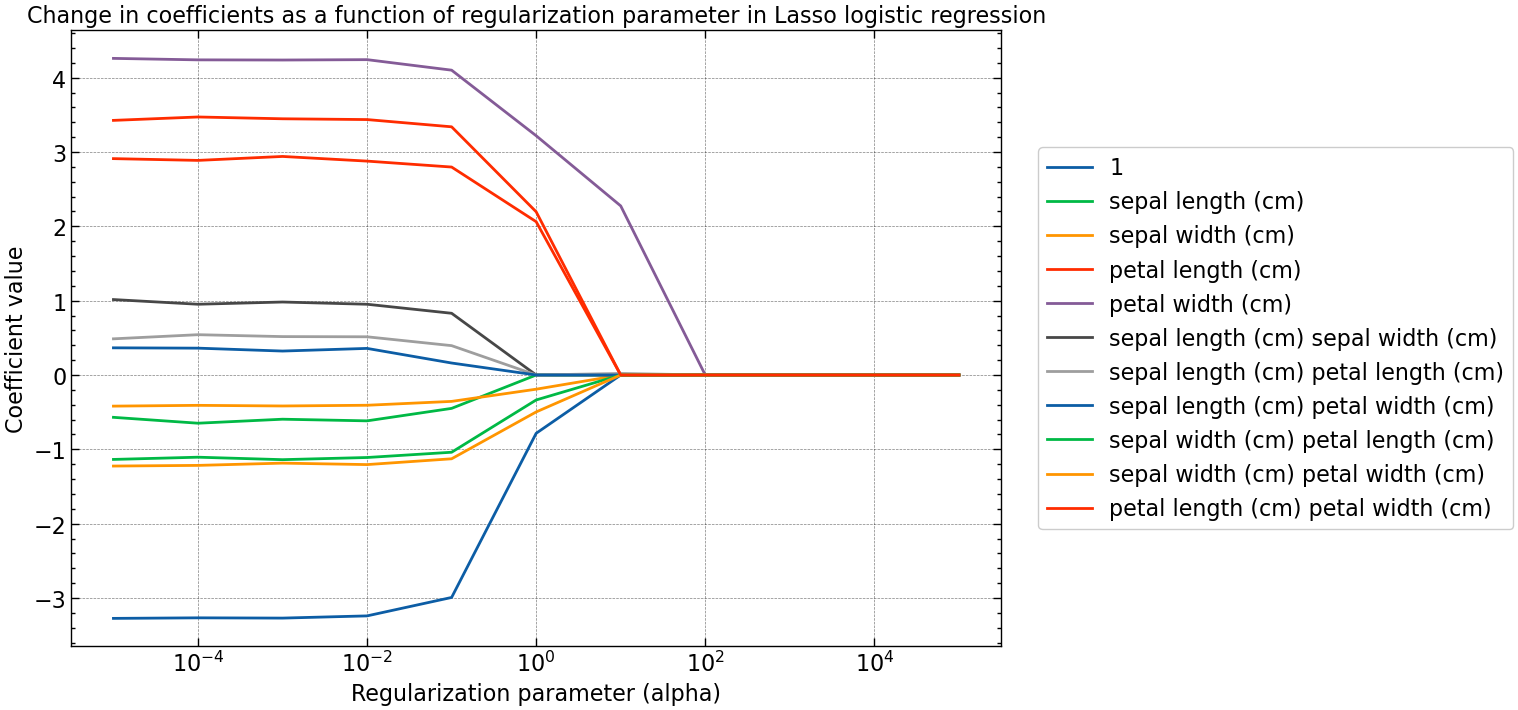

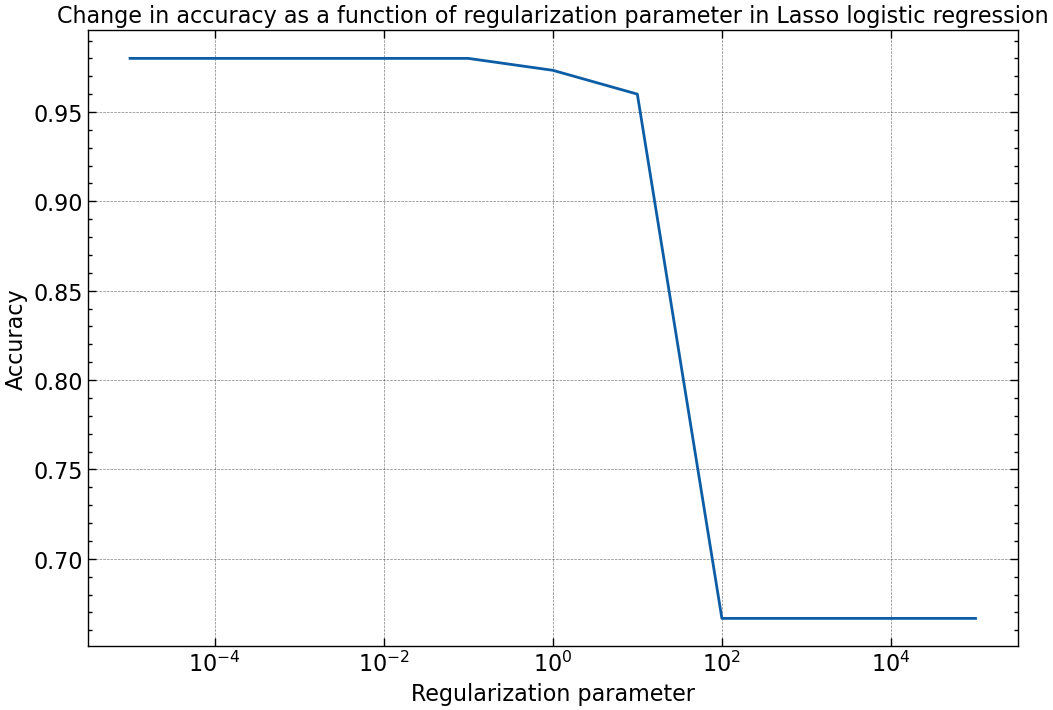

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris["data"]
y = (iris["target"] == 2).astype(int)
feature_names = iris["feature_names"]

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Add polynomial interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_std)
interaction_names = poly.get_feature_names(feature_names)

# Define a range of regularization parameters
alphas = np.logspace(-5, 5, 11)

# Store the coefficients and accuracy at each iteration
coefs = []
accuracies = []

# Loop over each regularization parameter
for alpha in alphas:
    # Train the Lasso logistic regression model
    clf = LogisticRegression(penalty="l1", C=1/alpha, solver="saga")
    clf.fit(X_poly, y)
    coefs.append(clf.coef_[0])
    y_pred = clf.predict(X_poly)
    accuracies.append(accuracy_score(y, y_pred))

# Plot the change in coefficients as a function of the regularization parameter
plt.figure(figsize=(12, 8))
for i in range(len(interaction_names)):
    plt.plot(alphas, [coef[i] for coef in coefs], label=interaction_names[i])
plt.xscale("log")
plt.xlabel("Regularization parameter (alpha)")
plt.ylabel("Coefficient value")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.title("Change in coefficients as a function of regularization parameter in Lasso logistic regression")
plt.show()

# Plot the change in accuracy as a function of the regularization parameter
plt.figure(figsize=(12, 8))
plt.plot(alphas, accuracies)
plt.xscale("log")
plt.xlabel("Regularization parameter")
plt.ylabel("Accuracy")
plt.title("Change in accuracy as a function of regularization parameter in Lasso logistic regression")
plt.show()

## 3.2 Ridge Logistic Regression

**Using Iris dataset, and let's pretend that there are 2 classes**

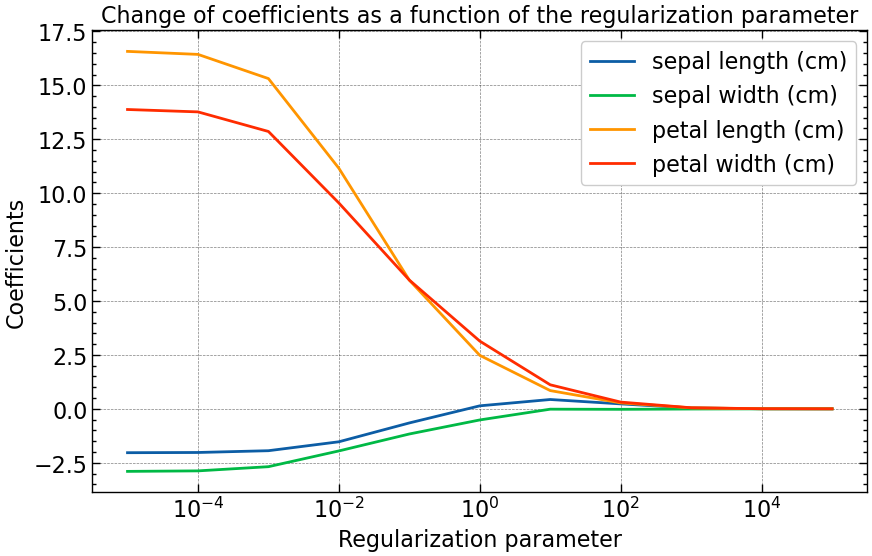

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris["data"]
y = (iris["target"] == 2).astype(int)

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Define a range of regularization parameters
alphas = np.logspace(-5, 5, 11)

# Store the coefficients at each iteration
coefs = []
for alpha in alphas:
    logreg = LogisticRegression(penalty="l2", C=1/alpha)
    logreg.fit(X_std, y)
    coefs.append(logreg.coef_[0])

# Plot the coefficients as a function of the regularization parameter
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(alphas, [coef[i] for coef in coefs], label=iris.feature_names[i])
plt.xscale("log")
plt.xlabel("Regularization parameter")
plt.ylabel("Coefficients")
plt.title("Change of coefficients as a function of the regularization parameter")
plt.legend()
plt.show()

In this code, the regularization penalty is set to "l2", which corresponds to Ridge logistic regression, using the penalty argument. The range of regularization parameters is defined using np.logspace, and the coefficients are stored at each iteration using a loop over the range of alphas. Finally, a plot is created showing how the coefficients change as the regularization parameter increases. The xscale function is used to set the x-axis to a logarithmic scale, which makes it easier to see the changes in the coefficients over a wide range of values for the regularization parameter.

## Adding interaction terms

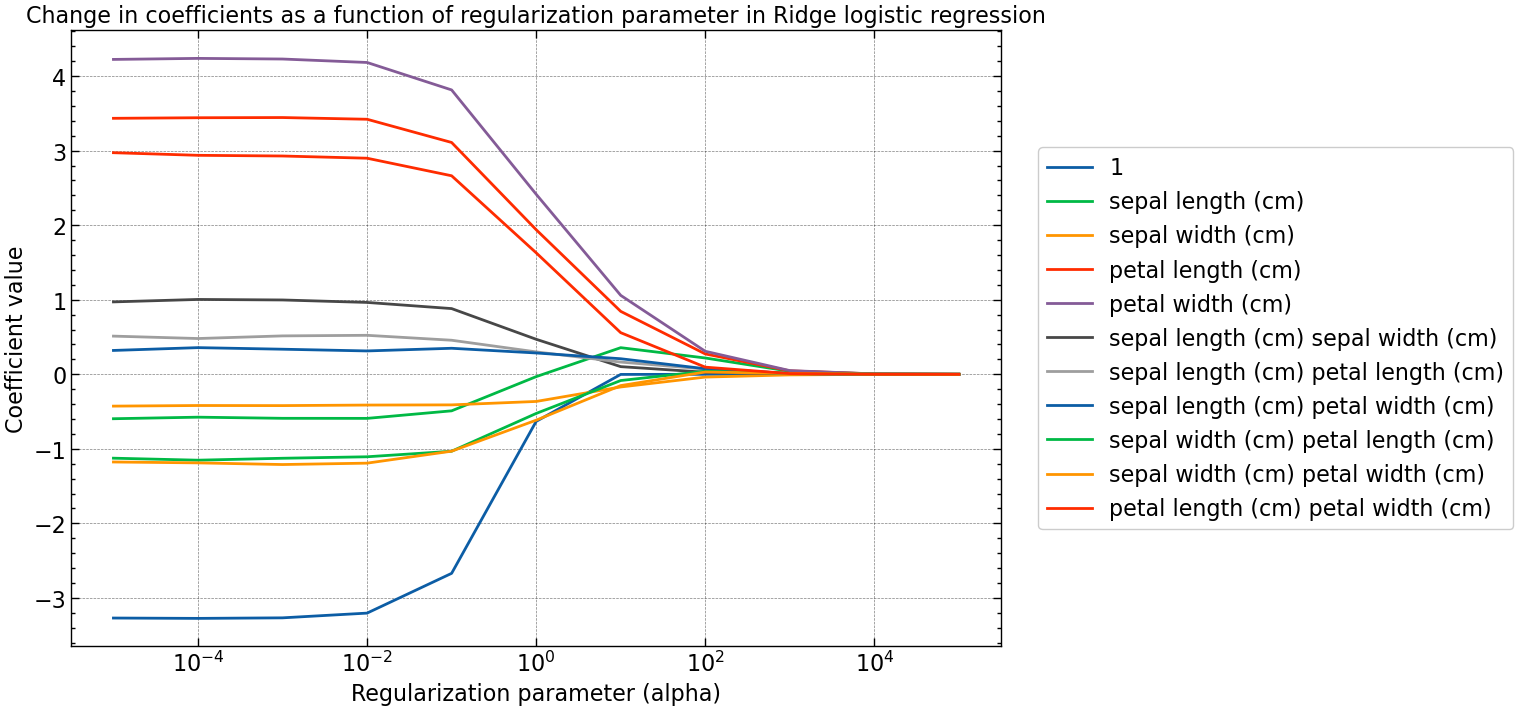

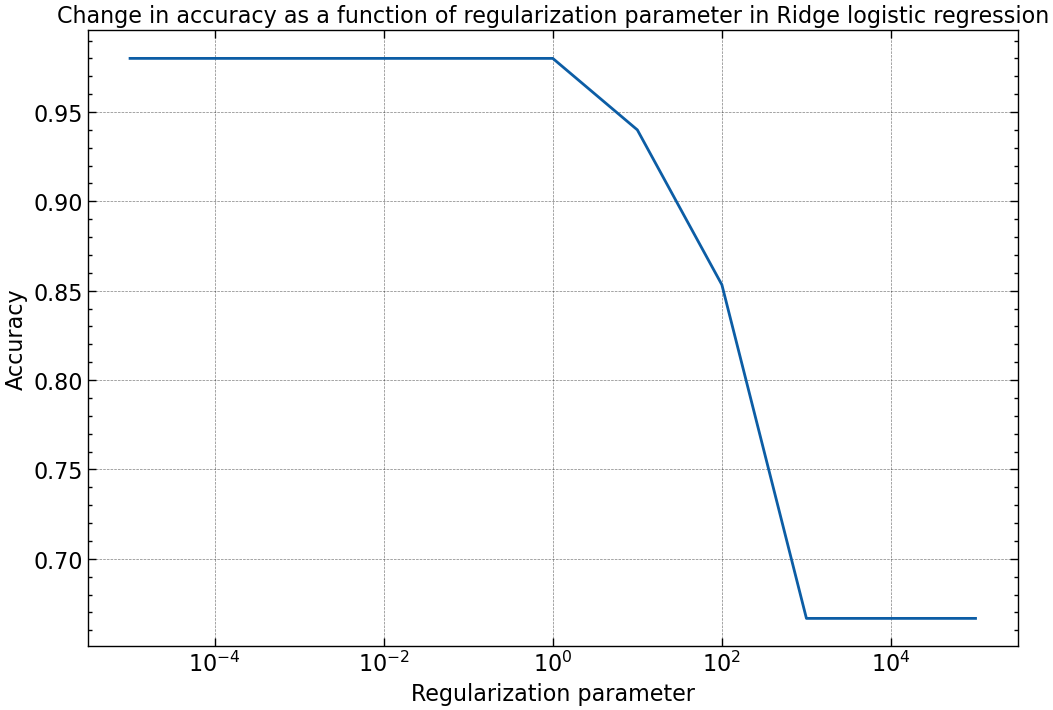

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris["data"]
y = (iris["target"] == 2).astype(int)
feature_names = iris["feature_names"]

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Add polynomial interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_std)
interaction_names = poly.get_feature_names(feature_names)

# Define a range of regularization parameters
alphas = np.logspace(-5, 5, 11)

# Store the coefficients and accuracy at each iteration
coefs = []
accuracies = []

# Loop over each regularization parameter
for alpha in alphas:
    # Train the Ridge logistic regression model
    clf = LogisticRegression(penalty="l2", C=1/alpha, solver="saga")
    clf.fit(X_poly, y)
    coefs.append(clf.coef_[0])
    y_pred = clf.predict(X_poly)
    accuracies.append(accuracy_score(y, y_pred))

# Plot the change in coefficients as a function of the regularization parameter
plt.figure(figsize=(12, 8))
for i in range(len(interaction_names)):
    plt.plot(alphas, [coef[i] for coef in coefs], label=interaction_names[i])
plt.xscale("log")
plt.xlabel("Regularization parameter (alpha)")
plt.ylabel("Coefficient value")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.title("Change in coefficients as a function of regularization parameter in Ridge logistic regression")
plt.show()

# Plot the change in accuracy as a function of the regularization parameter
plt.figure(figsize=(12, 8))
plt.plot(alphas, accuracies)
plt.xscale("log")
plt.xlabel("Regularization parameter")
plt.ylabel("Accuracy")
plt.title("Change in accuracy as a function of regularization parameter in Ridge logistic regression")
plt.show()

# 4. KNN (Classification and Regression)

**KNN stands for K-Nearest Neighbors, which is a simple machine learning algorithm used for classification and regression tasks.** In layman's terms, KNN works by trying to classify a new data point based on the values of its closest "neighbors" in the dataset.

For example, let's say you want to classify a new fruit as either an apple or an orange based on its size and weight. The KNN algorithm would look for the K closest fruit in the dataset (based on size and weight), and classify the new fruit based on the majority class of its K nearest neighbors.

So, the idea behind KNN is simple: similar data points tend to belong to similar classes, and by finding the nearest neighbors of a new data point, we can get an idea of what class it belongs to.

**The basic idea behind KNN is to predict the class or output value of an unseen observation by looking at its "k" nearest neighbors in the training data, where "k" is a user-defined parameter.** The prediction is based on the majority vote or average of the "k" nearest neighbors.

KNN belongs to a class of machine learning algorithms known as instance-based methods, where the prediction is made based on a similarity measure between the new observation and the observations in the training data. KNN is often used in applications where the number of features is high, and it is not practical or possible to model the relationship between the features and the output explicitly.

From a statistical perspective, KNN can be seen as a form of data-driven, non-parametric density estimation, where the prediction for a new observation is made based on the density of the training data in its neighborhood. The choice of "k" influences the trade-off between bias and variance in the predictions, with small values of "k" leading to high variance and low bias, and large values of "k" leading to low variance and high bias.

Overall, KNN is a simple and effective method for solving both classification and regression problems, especially in cases where the relationship between the features and the output is non-linear or complex. Its simplicity and versatility make it a popular choice for many data analysis tasks.

# Classffication

## 4.1 Simulated Data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate random data
np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:,0] + X[:,1] > 0).astype(int)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

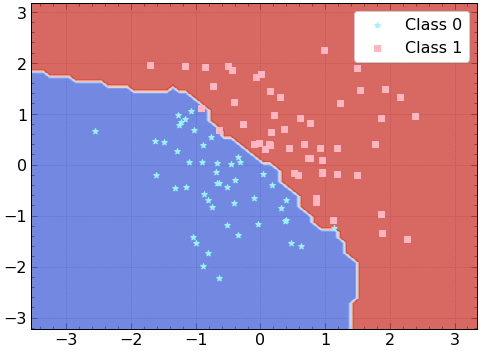

In [16]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
classes = ["Class 0", "Class 1"]
plt.scatter(X[np.where(y==0)][:,0], X[np.where(y==0)][:,1], marker='*',color='#98F5FF',label=classes[0])
plt.scatter(X[np.where(y==1)][:,0], X[np.where(y==1)][:,1], marker='s',color='#FFB6C1', label=classes[1])

# Add a legend
plt.legend()

plt.show()

## 4.2 Iris Dataset

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data
y_iris= iris.target
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

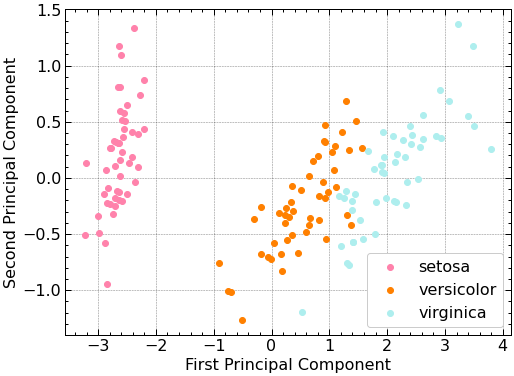

In [79]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit a KNN classifier to the PCA-transformed data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y_iris)

# Plot the data
plt.figure(figsize=(8, 6))
colors = ["#FF82AB", "#FF8000", "#AEEEEE"]
for i in range(3):
    x = X_pca[np.where(y_iris==i)][:,0]
    y = X_pca[np.where(y_iris==i)][:,1]
    plt.scatter(x, y, color=colors[i], label=iris.target_names[i])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.show()

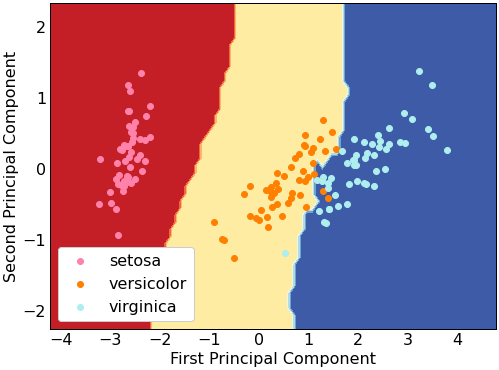

In [80]:
# Plot the decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
for i in range(3):
    x = X_pca[np.where(y_iris==i)][:,0]
    y = X_pca[np.where(y_iris==i)][:,1]
    plt.scatter(x, y, color=colors[i], label=iris.target_names[i])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.show()

## 4.3 GridsearchCV

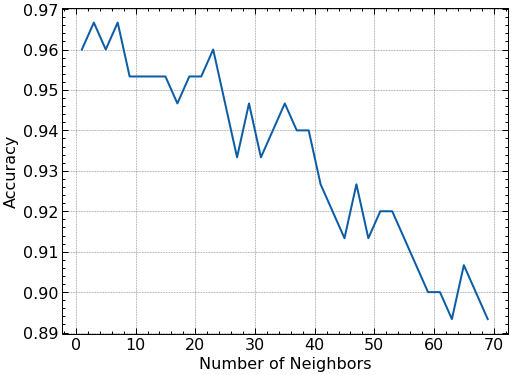

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a KNN classifier and fit it to the PCA-transformed data
knn = KNeighborsClassifier()

# Define the parameter grid to search over
param_grid = {"n_neighbors": np.arange(1, 70, 2)}

# Use GridSearchCV to find the best number of neighbors
grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_pca, y)

# Plot the accuracy as a function of the number of neighbors
plt.plot(param_grid["n_neighbors"], grid_search.cv_results_["mean_test_score"])
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

# Regression 

## 4.4 Simulated Data

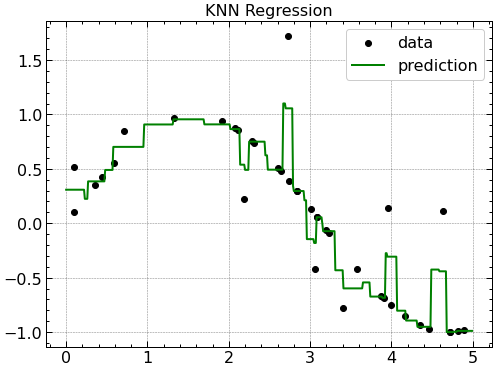

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Generate simulated data
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))

# Fit the KNN regressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, y)

# Predict on a grid of points
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = neigh.predict(X_test)

# Plot the results
plt.scatter(X, y, c='k', label='data')
plt.plot(X_test, y_pred, c='g', label='prediction')
plt.legend()
plt.title('KNN Regression')
plt.show()

## 4.5 California Housing Dataset

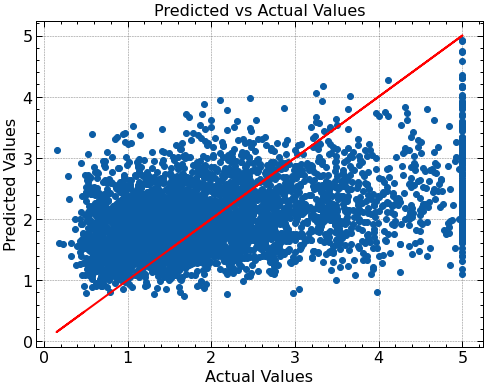

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
dataset = fetch_california_housing()
X = dataset.data
y = dataset.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Predict using the trained model
y_pred = knn_regressor.predict(X_test)

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

## 4.6 Gridsearch CV

1. n_neighbors: The number of nearest neighbors to consider for each prediction. It's an integer value that determines the size of the neighborhood used to make predictions.

2. weights: The weight function used in prediction. It determines how much weight should be given to each of the nearest neighbors. Possible values are:

- 'uniform': All neighbors are weighted equally.
- 'distance': The weight of each neighbor is proportional to the inverse of its distance.
3. algorithm: The algorithm used to compute the nearest neighbors. Possible values are:

- 'brute': The brute-force algorithm.
- 'kd_tree': The k-dimensional tree algorithm.
- 'ball_tree': The ball tree algorithm.
- leaf_size: The size of the leaf nodes in the ball tree or kd-tree algorithm. The value should be an integer that is used to control the tradeoff between time and space complexity of the algorithm.

4. metric: The distance metric used to compute the nearest neighbors. Possible values are:

- 'euclidean': The Euclidean distance.
- 'manhattan': The Manhattan distance.
- 'minkowski': The Minkowski distance.
5. p: The power parameter for the Minkowski metric. If p=2, the Minkowski distance is the same as the Euclidean distance. If p=1, the Minkowski distance is the same as the Manhattan distance.

6. n_jobs: The number of parallel jobs to run. If n_jobs=1, the computation is done sequentially. If n_jobs=-1, the number of jobs is set to the number of cores.
 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Load the California Housing Dataset
data = fetch_california_housing()
X = data["data"]
y = data["target"]

In [8]:
# Define the grid of hyperparameters to search
param_grid = {'n_neighbors': np.arange(3, 8),
              'weights': ['uniform', 'distance']}

# Create a KNN Regressor
knn = KNeighborsRegressor()

# Create the GridSearchCV object
grid = GridSearchCV(knn, param_grid, cv=10)

# Fit the GridSearchCV object to the data
grid.fit(X, y)

# Plot the results
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.336653,0.026730,0.076642,0.028364,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",-0.098196,-0.085104,0.048438,0.014687,0.052493,-0.003277,-0.899167,-0.090386,-0.766223,-0.134335,-0.196107,0.325492,10
1,0.320999,0.028798,0.067484,0.022917,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",-0.095212,-0.058326,0.060558,0.024648,0.066346,0.008408,-0.894227,-0.079561,-0.730641,-0.097746,-0.179575,0.323744,9
2,0.330757,0.050809,0.068995,0.012760,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",-0.006778,-0.065316,0.084546,0.059016,0.054946,0.026840,-0.801035,-0.076298,-0.762449,-0.098529,-0.158506,0.317168,8
3,0.336928,0.057615,0.071582,0.010338,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",-0.008736,-0.033214,0.099375,0.084612,0.074288,0.041770,-0.780631,-0.058353,-0.722659,-0.062139,-0.136569,0.312707,6
4,0.430313,0.130596,0.095223,0.034853,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.038265,-0.062495,0.076177,0.104790,0.049476,0.037426,-0.743533,-0.052978,-0.735343,-0.083733,-0.137195,0.306784,7
5,0.348911,0.053981,0.074665,0.011593,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.038127,-0.028683,0.097186,0.129039,0.072356,0.056373,-0.722905,-0.035052,-0.698197,-0.046898,-0.113865,0.303419,3
6,0.387630,0.072940,0.089101,0.019694,6,uniform,"{'n_neighbors': 6, 'weights': 'uniform'}",0.072723,-0.053544,0.081243,0.145176,0.044710,0.061977,-0.741949,-0.036334,-0.712129,-0.063022,-0.120115,0.309888,5
7,0.378644,0.102473,0.101171,0.049069,6,distance,"{'n_neighbors': 6, 'weights': 'distance'}",0.071113,-0.020540,0.103937,0.167081,0.070775,0.078633,-0.711583,-0.020062,-0.678314,-0.025881,-0.096484,0.304931,2
8,0.384465,0.064074,0.099093,0.035976,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.077123,-0.063025,0.087127,0.175959,0.034507,0.062035,-0.746184,-0.025205,-0.691182,-0.053275,-0.114212,0.310010,4
9,0.358310,0.048490,0.084923,0.010643,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.080345,-0.027094,0.109535,0.198177,0.063807,0.082139,-0.706817,-0.008691,-0.659834,-0.013604,-0.088204,0.304419,1


## 4.6 GridsearchCV

# 5.Decision Tree

**CART, or Classification and Regression Trees, is a popular machine learning algorithm used for both classification and regression tasks.** Essentially, CART is a type of decision tree algorithm that works by dividing the dataset into smaller and smaller subsets, based on the values of the features. The process continues until the subsets are pure, meaning that each subset contains only observations with the same output value.

Think of CART as a flowchart-like model that asks a series of questions about the features of a dataset, and the answers to these questions determine which subset of the data a given observation belongs to. Each question is represented by a node in the tree, and the answer to the question leads to one of two branches, represented by the child nodes of the parent node. The process continues until a leaf node is reached, which represents a pure subset of the data and the prediction for the output value.

To the layman, CART can be thought of as a tool that makes decisions based on a set of rules, similar to how a person might make decisions based on a set of criteria. CART is commonly used in applications such as customer segmentation, risk assessment, and loan approval, among others.

**CART is a type of decision tree algorithm that works by recursively partitioning the feature space into smaller and smaller regions, until each region corresponds to a single class in a classification problem or a single output value in a regression problem.** The tree is constructed in such a way that each partition is chosen to maximize the separation between the classes or minimize the variance of the output values in the region.

CART is a non-parametric method, which means that it does not make any assumptions about the underlying distribution of the data. This makes CART a powerful tool for solving complex problems, especially in cases where the underlying relationship between the features and the output is non-linear.

From a statistical perspective, CART can be seen as a form of recursive partitioning, where the feature space is divided into regions that are characterized by the values of the features. The tree is constructed by finding the optimal split points for the features at each node, based on a chosen criterion such as the Gini impurity for classification or mean squared error for regression. Once the tree is constructed, predictions are made by following the branches of the tree to the appropriate leaf node.

## 5.1 Regression

1. criterion: the function to measure the quality of a split. The default is "mse" (mean squared error). Another option is "mae" (mean absolute error).

2. splitter: the strategy used to choose the split at each node. The default is "best". Another option is "random".

3. max_depth: the maximum allowed depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples.

4. min_samples_split: the minimum number of samples required to split an internal node.

5. min_samples_leaf: the minimum number of samples required to be at a leaf node.

6. min_weight_fraction_leaf: the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.

7. max_features: the number of features to consider when looking for the best split. If "auto", then max_features=n_features. If "sqrt", then max_features=sqrt(n_features). If "log2", then max_features=log2(n_features).

8. random_state: the seed used by the random number generator.

9. max_leaf_nodes: the maximum number of leaf nodes. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples.



### SImulated Data

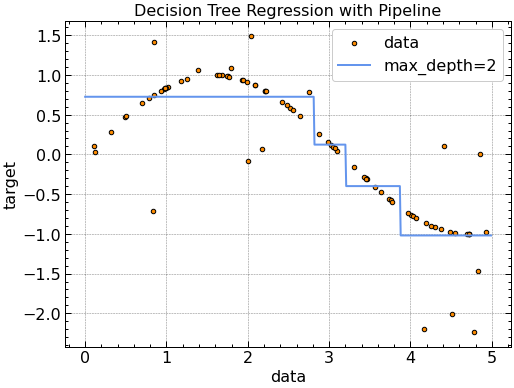

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# Generate simulated data
rng = np.random.default_rng()
X = 5 * rng.random((80, 1))
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.random(16))

# Create a pipeline with StandardScaler and DecisionTreeRegressor
pipe = Pipeline([("scaler", StandardScaler()),
                 ("regressor", DecisionTreeRegressor(max_depth=2))])

# Train the pipeline
pipe.fit(X, y)

# Predict using the pipeline
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_hat = pipe.predict(X_test)

# Plot the results
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_hat, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression with Pipeline")
plt.legend()
plt.show()

### GridsearchCV

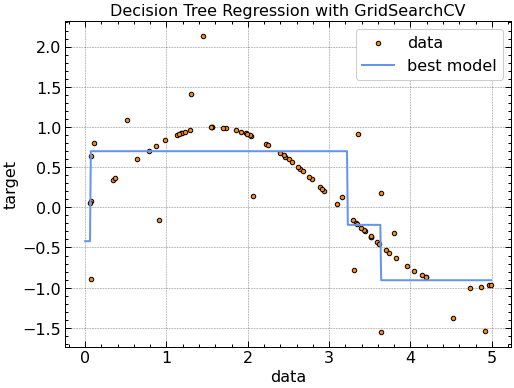

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Generate simulated data
rng = np.random.default_rng()
X = 5 * rng.random((80, 1))
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.random(16))

# Define the grid of hyperparameters to search
param_grid = {"max_depth": [1, 2, 3, 4, 5]}

# Train a Decision Tree Regressor with GridSearchCV
grid = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, cv=5)
grid.fit(X, y)

# Predict using the best Decision Tree Regressor found by GridSearchCV
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_hat = grid.predict(X_test)

# Plot the results
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_hat, color="cornflowerblue", label="best model", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression with GridSearchCV")
plt.legend()
plt.show()

## 5.2 Classification

- criterion: the function to measure the quality of a split. The default is "gini". Another option is "entropy".

- splitter: the strategy used to choose the split at each node. The default is "best". Another option is "random".

- max_depth: the maximum allowed depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples.

- : the minimum number of samples required to split an internal node.

- min_samples_leaf: the minimum number of samples required to be at a leaf node.

- min_weight_fraction_leaf: the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.

- max_features: the number of features to consider when looking for the best split. If "auto", then max_features=n_features. If "sqrt", then max_features=sqrt(n_features). If "log2", then max_features=log2(n_features).

- random_state: the seed used by the random number generator.

- max_leaf_nodes: the maximum number of leaf nodes. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples.

- ccp_alpha: the complexity parameter used for Cost-Complexity Pruning. The smaller the value, the more aggressive the prunin

### Simulated Data

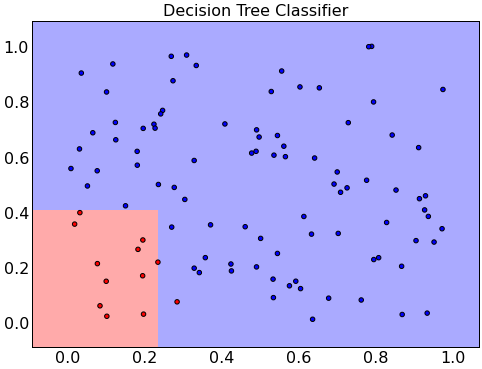

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# Generate simulated data
rng = np.random.default_rng()
X = rng.random((100, 2))
y = (X[:, 0] + X[:, 1] > 0.5).astype(int)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)

# Plot the decision boundary
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.grid(False)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("Decision Tree Classifier")
plt.show()

## Iris Dataset

In [20]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

# Split the data into features (X) and target (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the decision tree model
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


## Gridsearch CV 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

# Load the iris dataset
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

# Split the data into features (X) and target (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

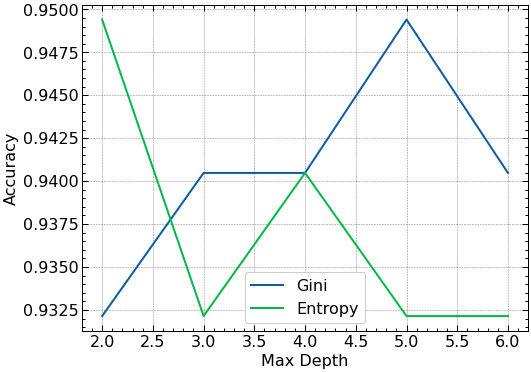

In [9]:
# Define the grid of hyperparameters to search
param_grid = {'max_depth': [2, 3, 4, 5, 6],
              'criterion': ['gini', 'entropy']}

# Create a scoring function using accuracy
scorer = make_scorer(accuracy_score)

# Train a decision tree model using GridSearchCV
clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, scoring=scorer,cv=8 )
clf = clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Plot the results of the grid search
plt.plot(param_grid['max_depth'], clf.cv_results_['mean_test_score'][::2], label='Gini')
plt.plot(param_grid['max_depth'], clf.cv_results_['mean_test_score'][1::2], label='Entropy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()